# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [50]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create a new dataframe from your CSV
df = pd.read_csv('aidedd_blocks2.csv')

In [51]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)

(762, 53)
name                   object
size                   object
type                   object
alignment              object
languages              object
ac                    float64
hp                      int64
cr                    float64
speed                   int64
swim                    int64
fly                     int64
climb                   int64
burrow                  int64
passive_perception      int64
darkvision              int64
truesight               int64
tremorsense             int64
blindsight              int64
strength                int64
str_mod                 int64
dex                     int64
dex_mod                 int64
con                     int64
con_mod                 int64
intel                   int64
int_mod                 int64
wis                     int64
wis_mod                 int64
cha                     int64
cha_mod                 int64
str_save                int64
dex_save                int64
con_save                int64


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

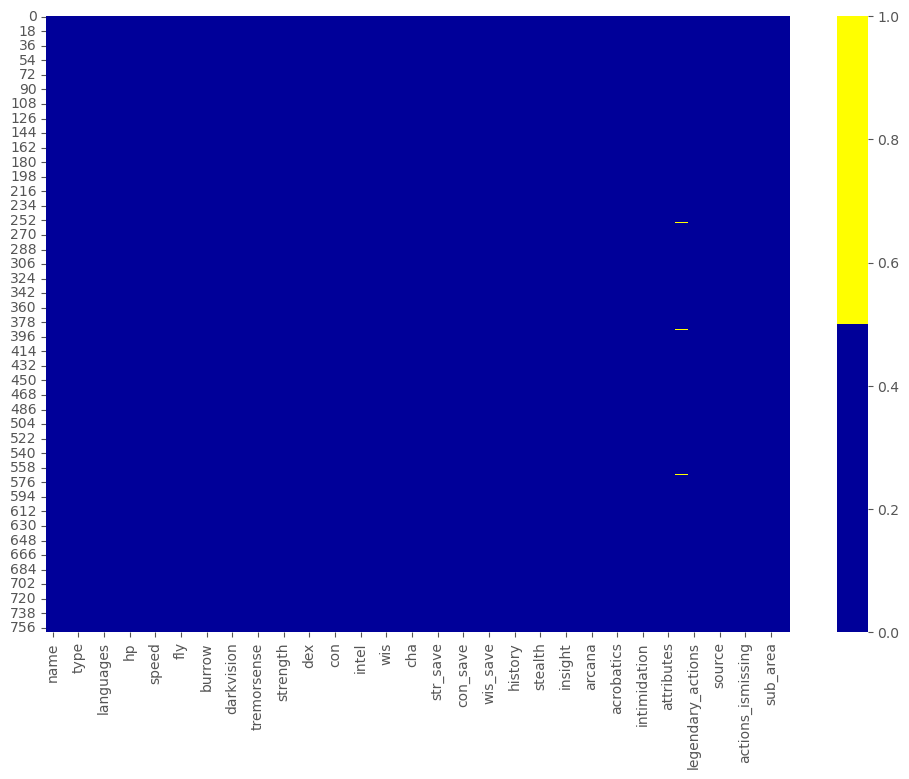

In [30]:
# Plot a heatmap of any missing data
cols = df.columns[:80] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [31]:
# Try out a missing data percentage list! 

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
size - 0%
type - 0%
alignment - 0%
languages - 0%
ac - 0%
hp - 0%
cr - 0%
speed - 0%
swim - 0%
fly - 0%
climb - 0%
burrow - 0%
passive_perception - 0%
darkvision - 0%
truesight - 0%
tremorsense - 0%
blindsight - 0%
strength - 0%
str_mod - 0%
dex - 0%
dex_mod - 0%
con - 0%
con_mod - 0%
intel - 0%
int_mod - 0%
wis - 0%
wis_mod - 0%
cha - 0%
cha_mod - 0%
str_save - 0%
dex_save - 0%
con_save - 0%
int_save - 0%
wis_save - 0%
cha_save - 0%
history - 0%
perception - 0%
stealth - 0%
persuasion - 0%
insight - 0%
deception - 0%
arcana - 0%
religion - 0%
acrobatics - 0%
athletics - 0%
intimidation - 0%
senses - 0%
attributes - 0%
actions - 0%
legendary_actions - 0%
legendary - 0%
source - 0%
attributes_ismissing - 0%
actions_ismissing - 0%
num_missing - 0%
sub_area - 0%
life_sq - 0%


created missing indicator for: actions


<Axes: xlabel='index'>

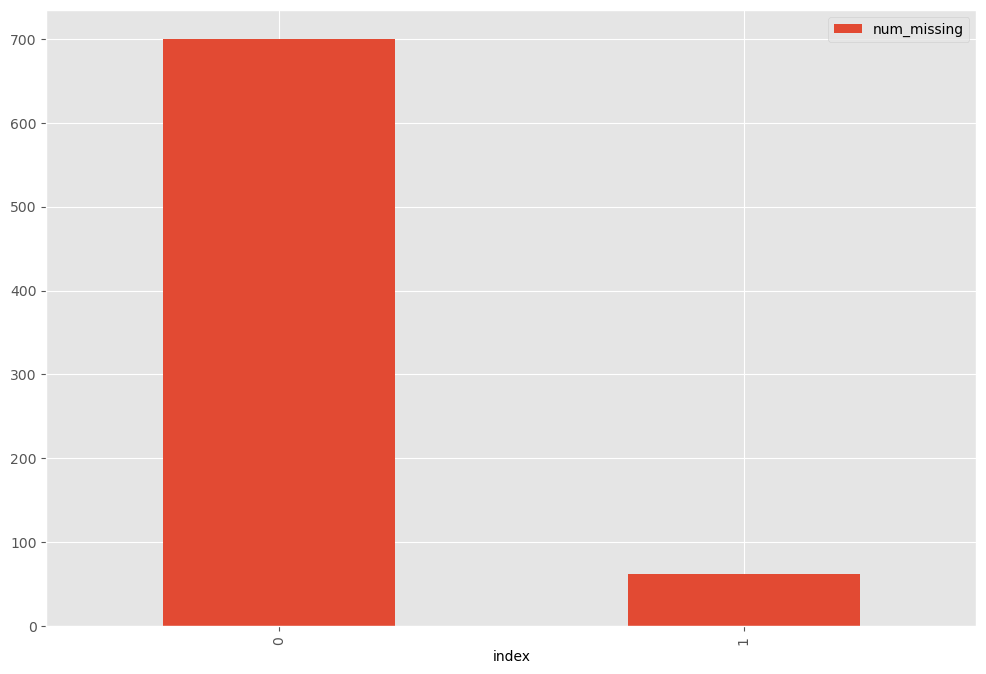

In [32]:
# Plot a missing data histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [33]:
# Handle any missing data in your dataframe.
# I'm unsure if the missing data has value or not, so I will replace the missing data instead of dropping it.

# Solution #4: Replace the Missing
# For categorical features, we can add a new category with a value such as “_MISSING_”. For numerical features, we can replace it with a particular value such as -999.

# This way, we are still keeping the missing values as valuable information.

# categorical
df['attributes'] = df['attributes'].fillna('_MISSING_')


# numeric
df['attributes'] = df['attributes'].fillna(-999)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<Axes: title={'center': 'ac'}>, <Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'cr'}>,
        <Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'swim'}>,
        <Axes: title={'center': 'fly'}>,
        <Axes: title={'center': 'climb'}>],
       [<Axes: title={'center': 'burrow'}>,
        <Axes: title={'center': 'passive_perception'}>,
        <Axes: title={'center': 'darkvision'}>,
        <Axes: title={'center': 'truesight'}>,
        <Axes: title={'center': 'tremorsense'}>,
        <Axes: title={'center': 'blindsight'}>,
        <Axes: title={'center': 'strength'}>],
       [<Axes: title={'center': 'str_mod'}>,
        <Axes: title={'center': 'dex'}>,
        <Axes: title={'center': 'dex_mod'}>,
        <Axes: title={'center': 'con'}>,
        <Axes: title={'center': 'con_mod'}>,
        <Axes: title={'center': 'intel'}>,
        <Axes: title={'center': 'int_mod'}>],
       [<Axes: title={'center': 'wis'}>,
        <Axes: title={'center': 

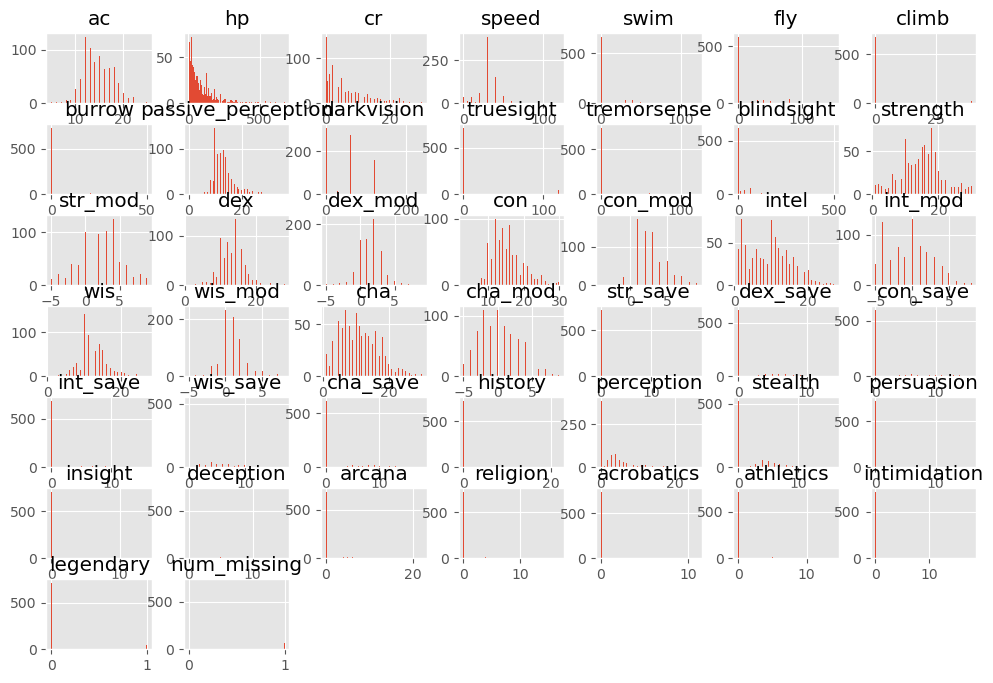

In [37]:
# Plot a histogram to see if there are any outliers.
df['ac'.hist(bins=100)

In [38]:
# Use the describe() 
df['fly'].describe()



count    762.000000
mean      13.661417
std       27.694709
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      150.000000
Name: fly, dtype: float64

<Axes: >

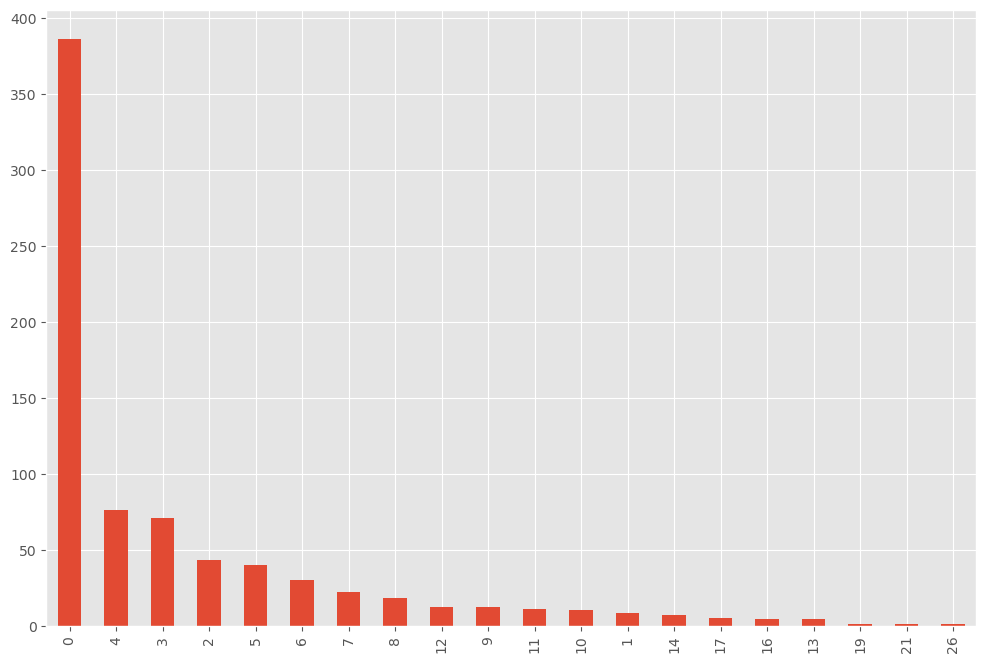

In [43]:
# Plot a bar chart

# # box plot.
# df.boxplot(column=['perception'])


# # bar chart -  distribution of a categorical variable
df['perception'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [44]:
# Handle any outliers in your dataframe
#outliers have specific need in the too; I'm hoping to create, these outliers exist purposefully

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [54]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df['source'].describe()


count                      762
unique                      17
top       Monster Manual (SRD)
freq                       326
Name: source, dtype: object

In [47]:
# Look for duplicates. How will you handle any duplicates?


num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()


burrow: 96.06299%
0     732
20      9
30      8
40      5
10      3
15      3
5       1
50      1
Name: burrow, dtype: int64

tremorsense: 97.50656%
0      743
60      15
120      2
30       2
Name: tremorsense, dtype: int64

persuasion: 95.01312%
0     724
5       7
4       6
8       5
6       5
13      3
9       3
10      2
15      2
16      1
11      1
12      1
3       1
7       1
Name: persuasion, dtype: int64

acrobatics: 97.63780%
0     744
5       5
6       4
4       4
11      2
8       2
7       1
Name: acrobatics, dtype: int64

actions_ismissing: 99.60630%
False    759
True       3
Name: actions_ismissing, dtype: int64



In [56]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

#If the data is not relevant to the querstion being asked- remove it. My project is trying to utilize this data to make DND encounters quick and easy. DND encounters require all monster's stats and data in order to properly play the game. With that in mind, I'm having a hard time marking any data as irrelevant.2

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [63]:
# Try to convert all the strings in a column to lower or upper case. 
df['alignment'].value_counts(dropna=False)


unaligned                                     171
chaotic evil                                  151
lawful evil                                   113
neutral evil                                  110
any alignment                                  62
neutral                                        43
chaotic neutral                                26
lawful good                                    23
lawful neutral                                 22
chaotic good                                   17
neutral good                                    8
any non-good alignment                          5
any evil alignment                              4
any non-lawful alignment                        3
any chaotic alignment                           2
neutral good (50 %) or neutral evil (50 %)      1
chaotic good (75 %) or neutral evil (25 %)      1
Name: alignment, dtype: int64

In [74]:

# make everything lower case.
for column in df:
    if df[column].dtype == "object":
        df[column] = df[column].str.lower()
        df[column].value_counts(dropna=False)
        


,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
408,lamia,large,monstrosity,chaotic evil,"abyssal, common",13.0,97,4.0,30,0,...,0,0,0,0,"darkvision 60 ft., passive perception 12",innate spellcasting. the lamia's innate spellc...,multiattack. the lamia makes two attacks: one ...,none,0,monster manual (srd)


In [75]:
df.sample(15)

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
750,yuan-ti-abomination,large,"monstrosity (shapechanger, yuan-ti)",neutral evil,"abyssal, common, draconic",15.0,127,7.00,40,0,...,0,0,0,0,"darkvision 60 ft., passive perception 15",shapechanger. the yuan-ti can use its action t...,multiattack (abomination form only). the yuan-...,none,0,monster manual (br)
675,vampire,medium,undead (shapechanger),lawful evil,the languages it knew in life,16.0,144,13.00,30,0,...,0,0,0,0,"darkvision 120 ft., passive perception 17",shapechanger. if the vampire isn't in sunlight...,multiattack (vampire form only). the vampire m...,"the vampire can take 3 legendary actions, choo...",1,monster manual (srd)
247,flameskull,tiny,undead,neutral evil,common,13.0,40,4.00,0,0,...,0,0,0,0,"darkvision 60 ft., passive perception 12",illumination. the flameskull sheds either dim ...,multiattack. the flameskull uses fire ray twic...,none,0,monster manual (srd)
666,troll,large,giant,chaotic evil,giant,15.0,84,5.00,30,0,...,0,0,0,0,"darkvision 60 ft., passive perception 12",keen smell. the troll has advantage on wisdom ...,multiattack. the troll makes three attacks: on...,none,0,monster manual (srd)
66,balhannoth,large,aberration,chaotic evil,"understands deep speech, telepathy 1 mile",17.0,114,11.00,25,0,...,0,0,0,0,"blindsight 500 ft. (blind beyond this radius),...",unavailable,unavailable,unavailable,0,mordenkainen's tome of foes
262,gas-spore,large,plant,unaligned,none,5.0,1,0.50,0,0,...,0,0,0,0,"blindsight 30 ft. (blind beyond this radius), ...",unavailable,unavailable,unavailable,0,monster manual
536,rat,tiny,beast,unaligned,none,10.0,1,0.00,20,0,...,0,0,0,0,"darkvision 30 ft., passive perception 10",keen smell. the rat has advantage on wisdom (p...,"bite. melee weapon attack: +0 to hit, reach 5 ...",none,0,monster manual (srd)
459,myconid-adult,medium,plant,lawful neutral,none,12.0,22,0.50,20,0,...,0,0,0,0,"darkvision 120 ft., passive perception 11",unavailable,unavailable,unavailable,0,monster manual
560,salamander,large,elemental,neutral evil,ignan,15.0,90,5.00,30,0,...,0,0,0,0,"darkvision 60 ft., passive perception 10",heated body. a creature that touches the salam...,multiattack. the salamander makes two attacks:...,none,0,monster manual (srd)
576,sibriex,huge,fiend (demon),chaotic evil,"all, telepathy 120 ft.",19.0,150,18.00,0,0,...,0,0,0,0,"truesight 120 ft., passive perception 23",contamination. the sibriex emits an aura of co...,multiattack. the sibriex uses squirt bile once...,"the sibriex can take 3 legendary actions, choo...",1,mordenkainen's tome of foes
